In [61]:
#improrting libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [62]:
iris=pd.read_csv("Iris.csv") 
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [63]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
iris.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [65]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

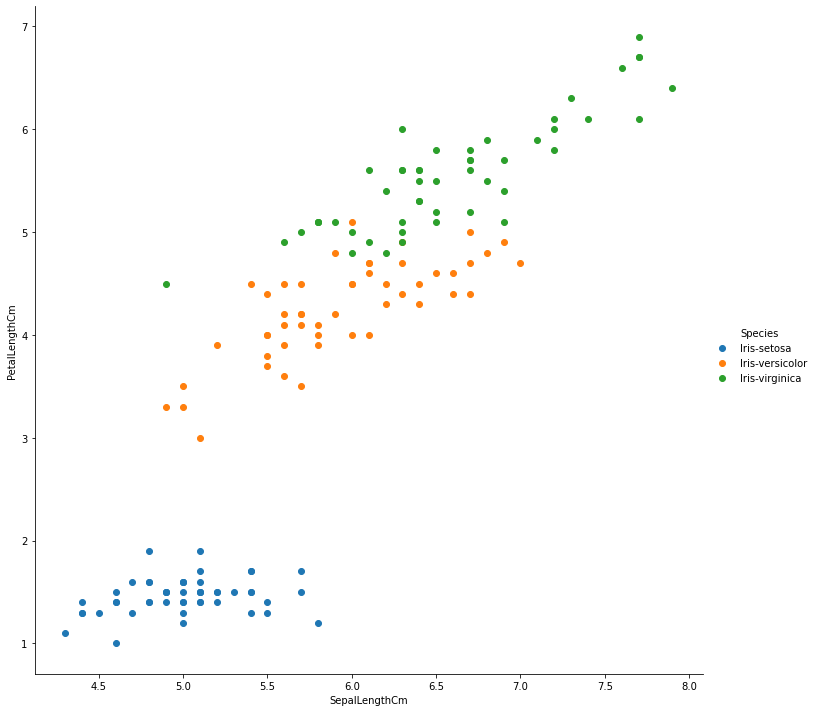

In [66]:
sns.FacetGrid(iris, hue="Species", height=10).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()

In [67]:
flowermapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris["Species"]=iris["Species"].map(flowermapping)

In [68]:
# preparing the training set
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

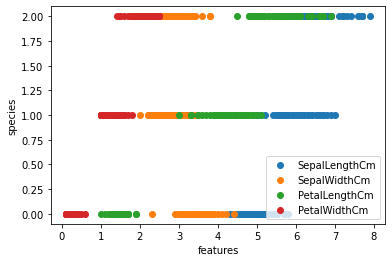

In [69]:
#ploting to understand relationship between species and the other attributes
plt.xlabel("features")
plt.ylabel("species")

pltx=iris.loc[:,"SepalLengthCm"]
plty=iris.loc[:,"Species"]
plt.scatter(pltx,plty,label='SepalLengthCm')

pltx=iris.loc[:,"SepalWidthCm"]
plty=iris.loc[:,"Species"]
plt.scatter(pltx,plty,label='SepalWidthCm')

pltx=iris.loc[:,"PetalLengthCm"]
plty=iris.loc[:,"Species"]
plt.scatter(pltx,plty,label='PetalLengthCm')

pltx=iris.loc[:,"PetalWidthCm"]
plty=iris.loc[:,"Species"]
plt.scatter(pltx,plty,label='PetalWidthCm')
plt.legend()

In [70]:
#spliting the data set into test and training
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [71]:
#model training using logistic regression
model=LogisticRegression()

In [72]:
model.fit(xtrain,ytrain)

C:\Users\mvish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
xtrain_prediction=model.predict(xtrain)
training_data_accuracy=accuracy_score(ytrain,xtrain_prediction)
print(training_data_accuracy)

1.0


In [74]:
xtest_prediction=model.predict(xtest)
test_data_accuracy=accuracy_score(ytest,xtest_prediction)
print(test_data_accuracy)

1.0


In [75]:
#using hyper parameters
parameter_grid=[
    {'penalty':['l1', 'l2', 'elasticnet', 'none'], 
     'C': np.logspace(-4,4,20),
     'solver':['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter':[100,1000,2500,5000]
    }
]

In [76]:
clf=GridSearchCV(model,param_grid=parameter_grid,cv=3,verbose=1,n_jobs=-1)

In [77]:
best_clf=clf.fit(xtrain,ytrain)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\mvish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mvish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mvish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mvish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

In [78]:
#finding the best hyper parameter usage
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [79]:
#after using hyper parameters
#fr train
xtrain__predictions= best_clf.predict(xtrain)
trainingdata_accuracy=accuracy_score(ytrain,xtrain__predictions)
print(trainingdata_accuracy)

1.0


In [80]:
#after using hyper parameters
#for test
xtest__predictions= best_clf.predict(xtest)
testdata_accuracy=accuracy_score(ytest,xtest__predictions)
print(testdata_accuracy)

1.0


In [81]:
#model testing
expected=ytest
predictions=best_clf.predict(xtest)
print(predictions)

[2 0 2 1 0 2 1 1 2 2 1 1 1 2 0 1 2 1 2 0 1 2 2 2 1 2 0 1 0 1]


In [82]:
print(classification_report(expected,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [83]:
print(accuracy_score(expected,predictions))

1.0


In [84]:
#checking the model predictions
input_data=(102,5.8,2.7,5.1,1.9)
data_numpyarray=np.asarray(input_data)

In [85]:
#reshaping as 1 datapoint
reshaped_input=data_numpyarray.reshape(1,-1)

In [86]:
predicted=best_clf.predict(reshaped_input)

C:\Users\mvish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [87]:
if(predicted==0):
    print("The flower is Iris-setosa")
elif(predicted==1):
    print("The flower is Iris-versicolor")
else:
    print("The flower is Iris-virginica")

The flower is Iris-virginica
